<a href="https://colab.research.google.com/github/vcoelh/ML/blob/main/multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [3]:
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples = m, centers = centers, cluster_std= std, random_state= 30)

/content/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


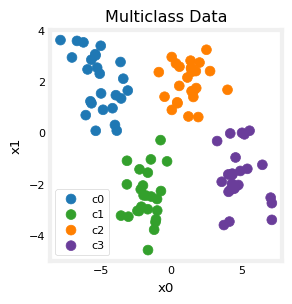

In [4]:
plt_mc(X_train, y_train, classes, centers, std = std)

In [7]:
## mostra quantas classes há no dataset
print(f' tipos de classes: {np.unique(y_train)}')
### como elas são representadas 
print(f' representação das classes: {y_train[:10]}')
### shape de X_train e de y_train
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')

 tipos de classes: [0 1 2 3]
 representação das classes: [3 3 3 0 3 3 3 3 2 0]
X_train: (100, 2), y_train: (100,)


In [28]:
from keras.mixed_precision.loss_scale_optimizer import optimizer
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.layers.Dense(units = 2, activation = 'relu', name = 'L1'),
        tf.keras.layers.Dense(units = 4, activation = 'linear', name = 'L2')
    ]
)

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
    optimizer = tf.keras.optimizers.Adam(0.001)
)

model.fit(
    X_train, y_train, epochs = 200
)

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 1.2408
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 1.2254
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 1.2115
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1980
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1840
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1713
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1574
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1441
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1310
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1188
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1062
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0935
Epoch 13/200
4/4 [==============================] - 0s 4ms/st

184/184 [==============================] - 0s 1ms/step


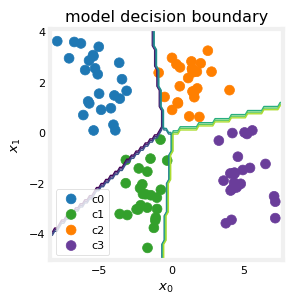

In [29]:
plt_cat_mc(X_train, y_train, model, classes)